In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

In [2]:
dataset = pd.read_csv('financial-data.csv')

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [6]:
#cleangin data

dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [7]:
df = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed' ])

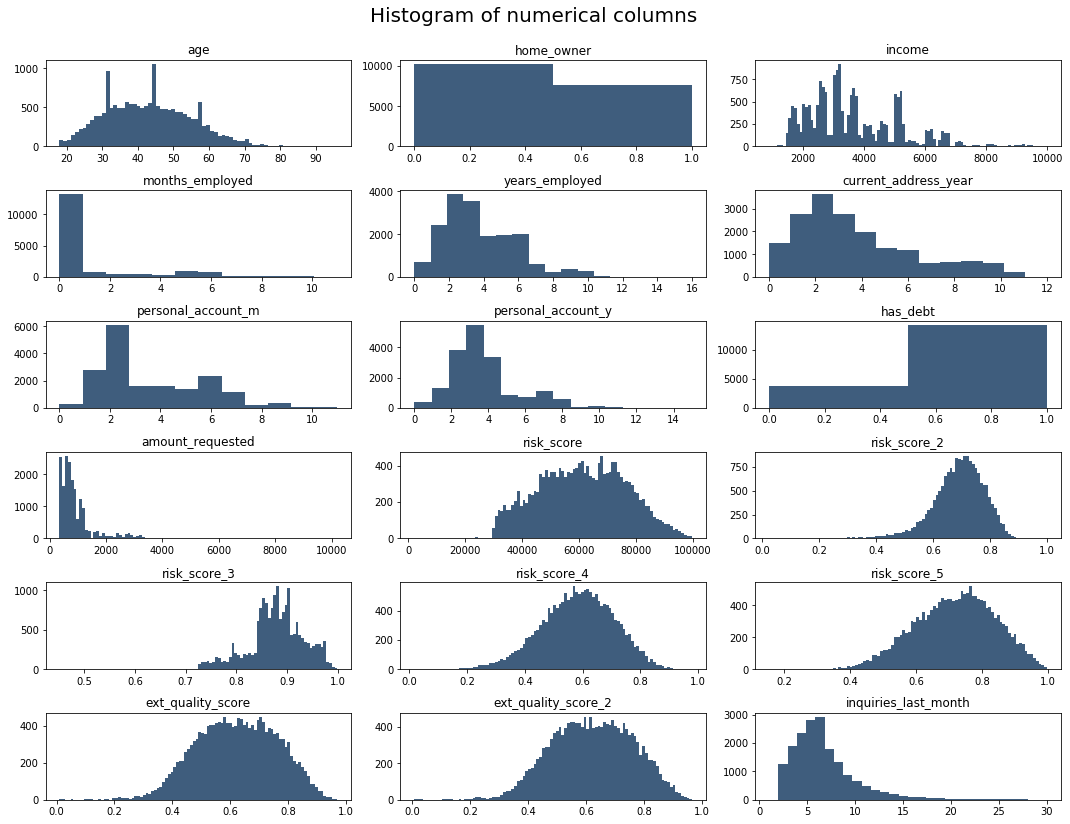

In [8]:
fig = plt.figure(figsize = (15,12))
plt.suptitle("Histogram of numerical columns ", fontsize = 20)
for i in range(df.shape[1]) :
    plt.subplot(6,3, i+1)
    f = plt.gca()
    f.set_title(df.columns.values[i])
    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

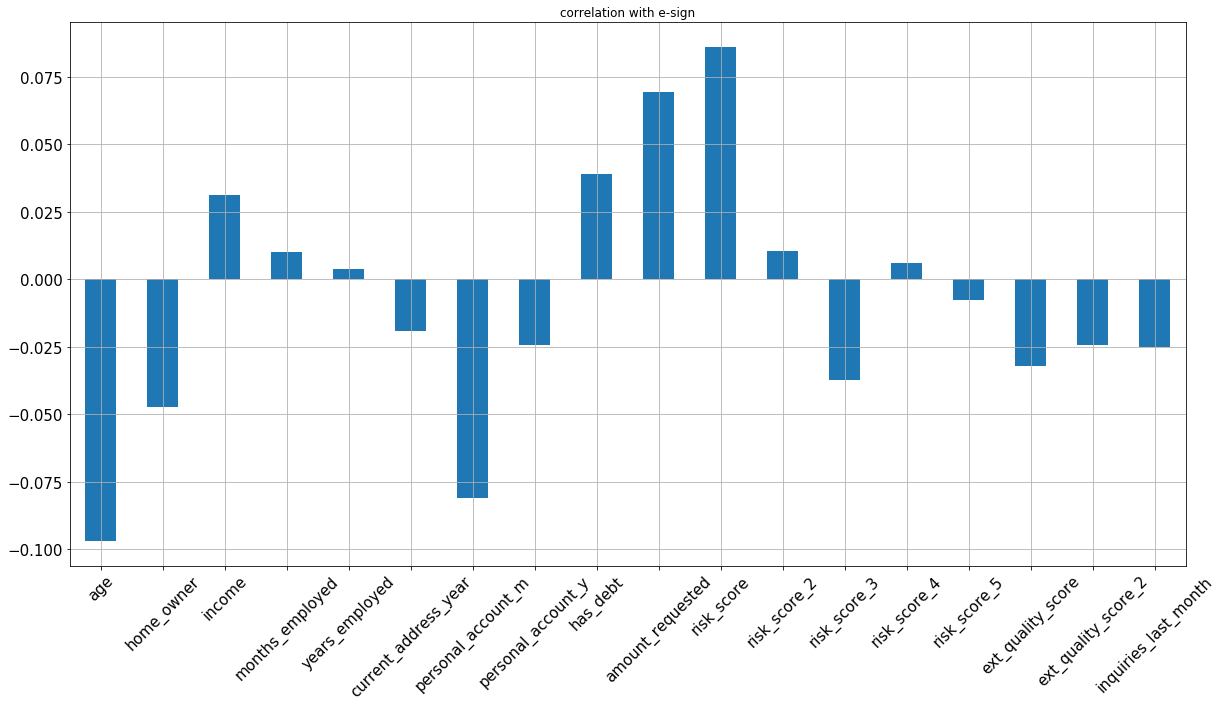

In [9]:
df.corrwith(dataset.e_signed).plot.bar(
        figsize = (20,10),
        title = "correlation with e-sign",
        fontsize = 15,
        rot = 45, grid = True)

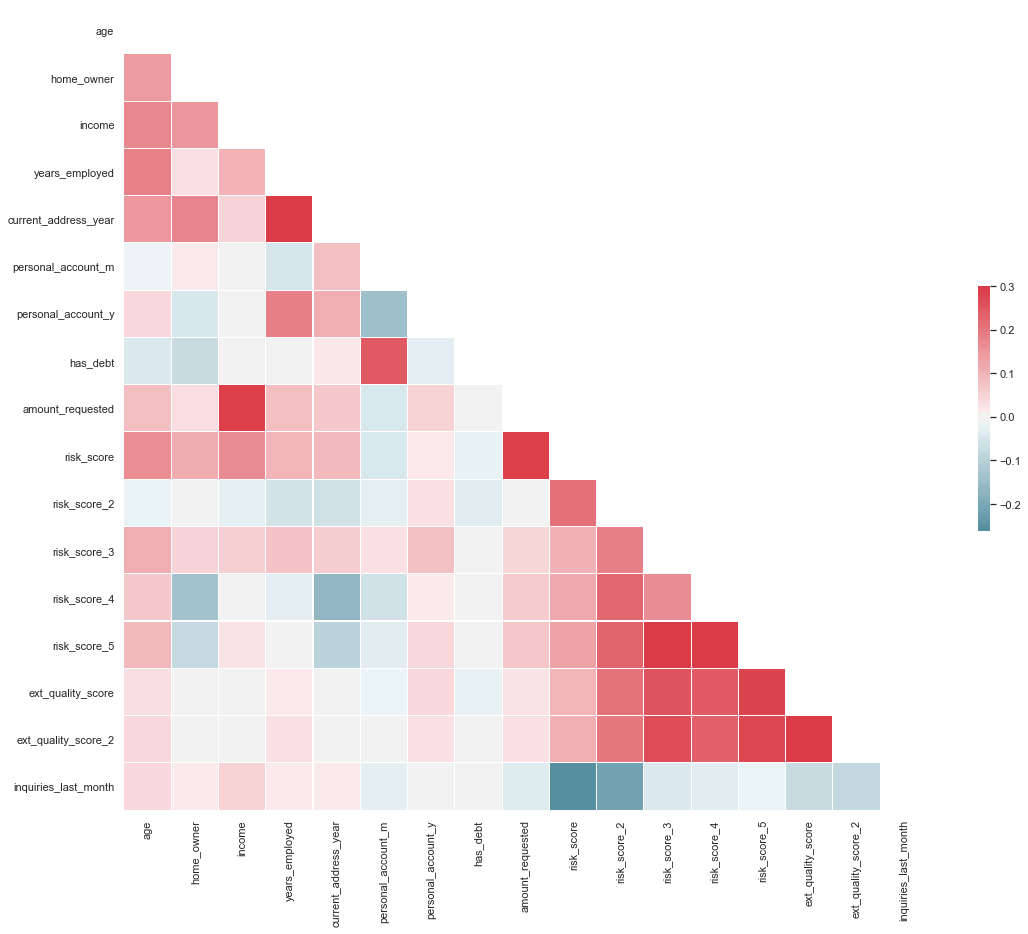

In [10]:
#Correlation matrix

sn.set(style = "white")
corr = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed', 'months_employed']).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18,15))
cmap = sn.diverging_palette(220,10, as_cmap = True)
sn.heatmap(corr, mask = mask, cmap = cmap, vmax =.3, center = 0, 
              square = True, linewidths = .1, cbar_kws = {"shrink":.3})

In [11]:
random.seed(100)

In [12]:
df = pd.read_csv('financial-data.csv')

In [13]:
df = df.drop(columns = ['months_employed'])

In [14]:
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y * 12))

In [15]:
df[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


In [16]:
df = df.drop(columns = ['personal_account_m', 'personal_account_y'])

In [17]:
#one hot encoding

df = pd.get_dummies(df)

In [18]:
df.columns


Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [19]:
df = df.drop(columns = ['pay_schedule_semi-monthly'])

In [20]:
#removing extra columns


response = df['e_signed']
user = df['entry_id']
df = df.drop(columns = ['e_signed', 'entry_id' ])

In [21]:
#splitting into train and text

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(df,
                                               response,
                                               test_size = 0.2,
                                               random_state = 0)

In [23]:
#feature scaling


from sklearn.preprocessing import StandardScaler

In [24]:
scx = StandardScaler()
xtrain2 = pd.DataFrame(scx.fit_transform(xtrain))
xtest2 = pd.DataFrame(scx.transform(xtest))


In [25]:
xtrain2.columns  = xtrain.columns.values
xtest2.columns  = xtest.columns.values

In [26]:
xtrain2.index = xtrain.index.values
xtest2.index = xtest.index.values

In [27]:
xtrain = xtrain2
xtest = xtest2

In [28]:
#logistic regression 

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
ypred  = classifier.predict(xtest)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [31]:
acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

In [32]:
results = pd.DataFrame([['Logistic Regression (Lasso)', acc, prec, rec, f1]],
            columns = ["Model", 'accuray', 'precision' , 'recall', 'f1 score'])

In [33]:
#SVM - linear


from sklearn.svm import SVC

classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
ypred  = classifier.predict(xtest)

acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

model_results = pd.DataFrame([['SVM linear', acc, prec, rec, f1]],
            columns = ["Model", 'accuray', 'precision' , 'recall', 'f1 score'])

results = results.append(model_results, ignore_index = True)

In [35]:
results

,Model,accuray,precision,recall,f1 score
0,Logistic Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM linear,0.568398,0.577769,0.735996,0.647354


In [36]:
#SVM - RBF


from sklearn.svm import SVC

classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

ypred  = classifier.predict(xtest)

acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

model_results = pd.DataFrame([['SVM rbf', acc, prec, rec, f1]],
            columns = ["Model", 'accuray', 'precision' , 'recall', 'f1 score'])

results = results.append(model_results, ignore_index = True)

In [37]:
results

,Model,accuray,precision,recall,f1 score
0,Logistic Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM linear,0.568398,0.577769,0.735996,0.647354
2,SVM rbf,0.591569,0.605730,0.690871,0.645505


In [38]:
#Random forest


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 0 , n_estimators = 100,
                                   criterion = 'entropy')
classifier.fit(xtrain, ytrain)

ypred  = classifier.predict(xtest)


acc = accuracy_score(ytest, ypred)
prec = precision_score(ytest, ypred)
rec = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
            columns = ["Model", 'accuray', 'precision' , 'recall', 'f1 score'])

results = results.append(model_results, ignore_index = True)

In [39]:
results

,Model,accuray,precision,recall,f1 score
0,Logistic Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM linear,0.568398,0.577769,0.735996,0.647354
2,SVM rbf,0.591569,0.605730,0.690871,0.645505
3,Random forest,0.621720,0.640098,0.678942,0.658948


In [46]:
#K_fold cross validation 


from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = xtrain,
                            y= ytrain, cv = 10)

print("Random forest classifier accuracy : %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))






Random forest classifier accuracy : 0.63 (+/- 0.03)
